In [1]:
import numpy as np 
import matplotlib.pyplot as plt

x = np.linspace(-5.0,5.0,100)
y = np.sqrt(10**2-x**2)
y = np.hstack([y,-y])
x = np.hstack([x,-x])

In [2]:
x1 = np.linspace(-5.0,5.0,100)
y1 = np.sqrt(5**2-x1**2)
y1 = np.hstack([y1,-y1])
x1 = np.hstack([x1,-x1])
print(x1)

[-5.         -4.8989899  -4.7979798  -4.6969697  -4.5959596  -4.49494949
 -4.39393939 -4.29292929 -4.19191919 -4.09090909 -3.98989899 -3.88888889
 -3.78787879 -3.68686869 -3.58585859 -3.48484848 -3.38383838 -3.28282828
 -3.18181818 -3.08080808 -2.97979798 -2.87878788 -2.77777778 -2.67676768
 -2.57575758 -2.47474747 -2.37373737 -2.27272727 -2.17171717 -2.07070707
 -1.96969697 -1.86868687 -1.76767677 -1.66666667 -1.56565657 -1.46464646
 -1.36363636 -1.26262626 -1.16161616 -1.06060606 -0.95959596 -0.85858586
 -0.75757576 -0.65656566 -0.55555556 -0.45454545 -0.35353535 -0.25252525
 -0.15151515 -0.05050505  0.05050505  0.15151515  0.25252525  0.35353535
  0.45454545  0.55555556  0.65656566  0.75757576  0.85858586  0.95959596
  1.06060606  1.16161616  1.26262626  1.36363636  1.46464646  1.56565657
  1.66666667  1.76767677  1.86868687  1.96969697  2.07070707  2.17171717
  2.27272727  2.37373737  2.47474747  2.57575758  2.67676768  2.77777778
  2.87878788  2.97979798  3.08080808  3.18181818  3

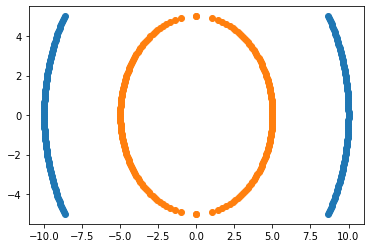

In [3]:
plt.scatter(y,x)
plt.scatter(y1,x1)

In [4]:
import pandas as pd
df1 = pd.DataFrame(np.vstack([y,x]).T,columns=['X1','X2'])
df1['Y'] = 0
df2 = pd.DataFrame(np.vstack([y1,x1]).T,columns=['X1','X2'])
df2['Y'] = 1
df = df1.append(df2)
df.head(3)
df.shape

(400, 3)

In [5]:
X = df.iloc[:,:2]
Y = df.Y
X.shape

(400, 2)

In [6]:
X

,X1,X2
0,8.660254,-5.00000
1,8.717792,-4.89899
2,8.773790,-4.79798
3,8.828277,-4.69697
4,8.881281,-4.59596
...,...,...
195,-1.969049,-4.59596
196,-1.714198,-4.69697
197,-1.406908,-4.79798
198,-0.999949,-4.89899


In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=0)

In [8]:
Y_train

50     1
63     0
112    1
159    0
83     1
      ..
123    1
192    0
117    0
47     0
172    0
Name: Y, Length: 300, dtype: int64

In [9]:
# linear kernel #

from sklearn.svm import SVC
classifier = SVC(kernel="linear")
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

In [10]:
from sklearn.metrics import accuracy_score

In [11]:
Y_pred = classifier.predict(X_test)
accuracy_score(Y_test,Y_pred)

0.45

In [12]:
# rbf kernel #

from sklearn.svm import SVC
classifier = SVC(kernel="rbf")
classifier.fit(X_train,Y_train)

SVC()

In [13]:
from sklearn.metrics import accuracy_score

In [14]:
Y_pred = classifier.predict(X_test)
accuracy_score(Y_test,Y_pred)

1.0

In [15]:
# polynomial kernel
# features will be x1, x2, x1_square, x2_square , x1*x2
df['X1_Square'] = df['X1']**2
df['X2_Square'] = df['X2']**2
df['X1*X2'] = df['X1']*df['X2']

In [16]:
df['Y']

0      0
1      0
2      0
3      0
4      0
      ..
195    1
196    1
197    1
198    1
199    1
Name: Y, Length: 400, dtype: int64

In [17]:
X = df[['X1','X2','X1_Square','X2_Square','X1*X2']]
y = df[['Y']]

In [18]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
195    1
196    1
197    1
198    1
199    1
Name: Y, Length: 400, dtype: int64

In [19]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=0)

In [20]:
X_train

,X1,X2,X1_Square,X2_Square,X1*X2
50,4.999745,0.050505,24.997449,0.002551,0.252512
63,9.906589,1.363636,98.140496,1.859504,13.508984
112,-3.263736,3.787879,10.651974,14.348026,-12.362637
159,-9.953852,-0.959596,99.079176,0.920824,9.551676
83,3.680983,3.383838,13.549638,11.450362,12.455852
...,...,...,...,...,...
123,-4.223140,2.676768,17.834915,7.165085,-11.304366
192,-9.031653,-4.292929,81.570758,18.429242,38.772248
117,-9.445795,3.282828,89.223038,10.776962,-31.008922
47,9.996811,-0.252525,99.936231,0.063769,-2.524447


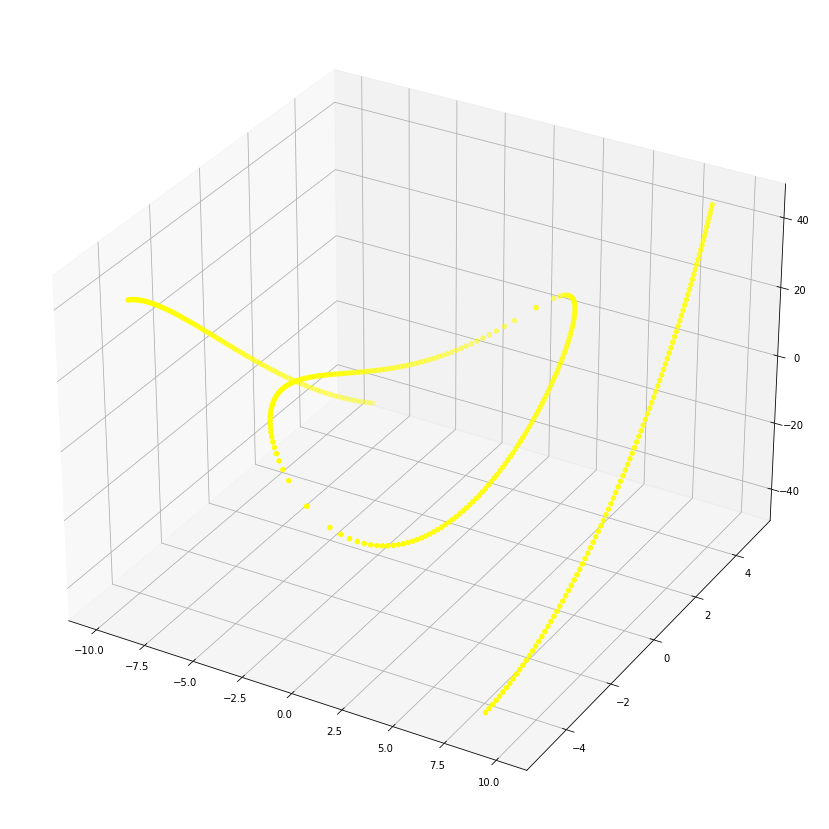

In [21]:
# plot using old features
fig = plt.figure(figsize = (15, 15))
ax = plt.axes(projection ="3d")
ax.scatter3D(df[['X1']], df[['X2']], df[['X1*X2']], color = "yellow")
plt.show()

In [22]:
df

,X1,X2,Y,X1_Square,X2_Square,X1*X2
0,8.660254,-5.00000,0,75.000000,25.000000,-43.301270
1,8.717792,-4.89899,0,75.999898,24.000102,-42.708375
2,8.773790,-4.79798,0,76.979390,23.020610,-42.096467
3,8.828277,-4.69697,0,77.938476,22.061524,-41.466150
4,8.881281,-4.59596,0,78.877155,21.122845,-40.818009
...,...,...,...,...,...,...
195,-1.969049,-4.59596,1,3.877155,21.122845,9.049671
196,-1.714198,-4.69697,1,2.938476,22.061524,8.051537
197,-1.406908,-4.79798,1,1.979390,23.020610,6.750316
198,-0.999949,-4.89899,1,0.999898,24.000102,4.898740


In [23]:
df = np.array(df)

In [24]:
df.shape

(400, 6)

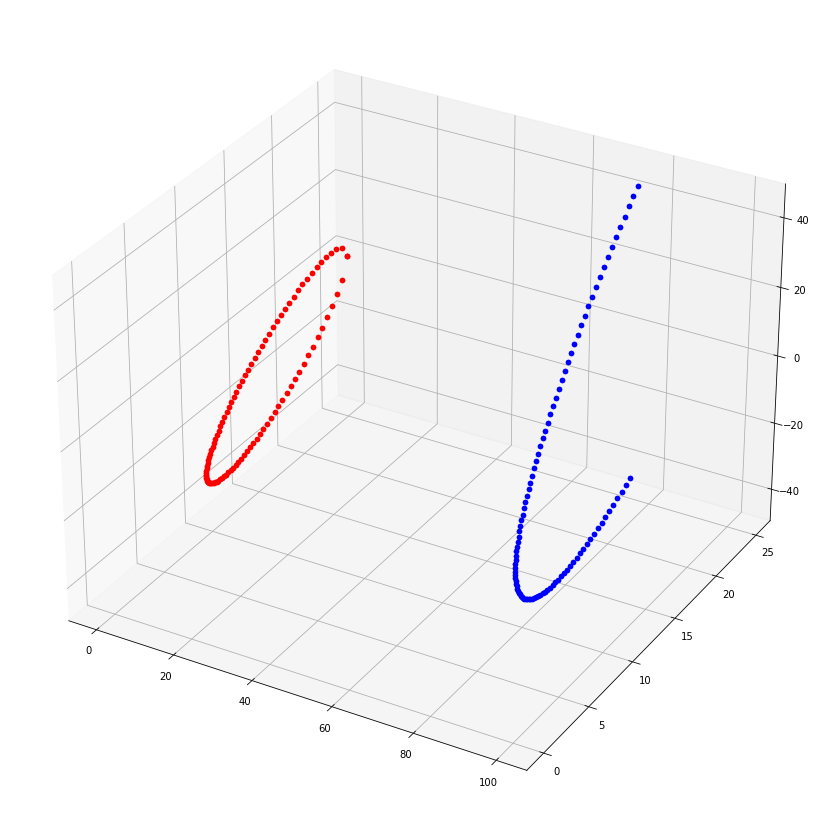

400


In [25]:
# plot using new features
fig = plt.figure(figsize = (15, 15))
ax = plt.axes(projection ="3d")
count =0
for i in range(len(df)):
    count+=1
    if df[i][2]==0.0 :
        ax.scatter(df[i][3],df[i][4],df[i][5],color="blue")
    else:
        ax.scatter(df[i][3],df[i][4],df[i][5],color="red")
plt.show()
print(count)